In [1]:
!pip install wordcloud

In [2]:
import regex
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [4]:
data = []
conversation = 'WhatsApp Chat with Cole P.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [5]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date      Time  Author  \
415 2021-06-15   1:19 AM  Cole P   
416 2021-06-15   1:21 AM   Nupur   
417 2021-06-15   9:42 PM  Cole P   
418 2021-06-15   9:42 PM  Cole P   
419 2021-06-15   9:43 PM   Nupur   
420 2021-06-15   9:45 PM  Cole P   
421 2021-06-15   9:45 PM  Cole P   
422 2021-06-15   9:45 PM   Nupur   
423 2021-06-15   9:45 PM  Cole P   
424 2021-06-15   9:45 PM  Cole P   
425 2021-06-15  10:58 PM   Nupur   
426 2021-06-18   6:51 PM   Nupur   
427 2021-06-18   6:51 PM   Nupur   
428 2021-06-18   6:52 PM  Cole P   
429 2021-06-18   8:31 PM   Nupur   
430 2021-06-18   8:36 PM  Cole P   
431 2021-06-19  12:20 AM   Nupur   
432 2021-06-19  12:20 AM   Nupur   
433 2021-06-27  12:54 PM   Nupur   
434 2021-06-27   2:07 PM   Nupur   

                                               Message  
415  Haam zamroor❤️💕 tomorrow I'll call Ik u might ...  
416                                 Aree bilkul krna🥰🥰  
417                                    <Media omitted>  
418            

In [6]:
total_messages = df.shape[0]
print(total_messages)

435


In [7]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

96


In [8]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Nupur and Cole")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared", links)

Chats between Nupur and Cole
Total Messages:  435
Number of Media Shared:  96
Number of Links Shared 8


In [9]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Nupur", "Cole"]
for i in range(len(l)):
  req_df= messages_df[messages_df["Author"] == l[i]]
  print(f'Stats of {l[i]} -')
  print('Messages Sent', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Nupur -
Messages Sent 164
Average Words per message 5.4817073170731705
Media Messages Sent 85
Links Sent 0
Stats of Cole -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Links Sent 0


<ipython-input-9-92b946cdf43f>:12: RuntimeWarning: invalid value encountered in longlong_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


## Lets make a word cloud for the most used texts in the chat

There are 9190 words in all the messages.


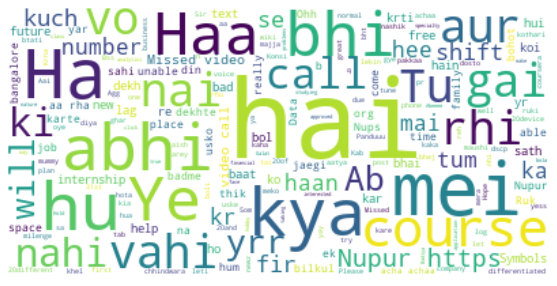

In [10]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Finding out the who sends most messages

In [11]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='count', ylabel='Author'>

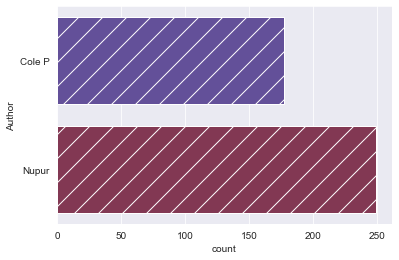

In [12]:
sns.countplot(y='Author', data=df, palette='twilight', hatch='/')